### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler 
from imblearn.over_sampling import SMOTE

from keras import Sequential
from keras.layers import Dense

from collections import Counter
import warnings

warnings.filterwarnings('ignore')

### Reading the data

In [37]:
df = pd.read_csv('./data/bankloan.csv')
df = df.dropna()
df.isna().any()
df = df.drop("Loan_ID", axis=1)
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

### Prepare the data

In [22]:
pre_y = df['Loan_Status']
pre_X=df.drop('Loan_Status', axis=1)
dm_X = pd.get_dummies(pre_X)
dm_y = pre_y.map(dict(Y=1, N=0))


### SMOTE analisys

In [24]:
smote = SMOTE(sampling_strategy='minority')
X1, y = smote.fit_sample(dm_X, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

### Train/Test the model

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

### Sequential model

In [32]:
classifier = Sequential()
classifier.add(Dense(200, activation='relu',                                                   kernel_initializer='random_normal',                                       input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu',
                     kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu',
                     kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='relu',
                     kernel_initializer='random_normal')) 
classifier.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=20, epochs=50, verbose=0)

eval_model = classifier.evaluate(X_train, y_train)
eval_model

17/17 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8719


[0.32741016149520874, 0.8719397187232971]

### Prediction

In [33]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

### Confusion metrics

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

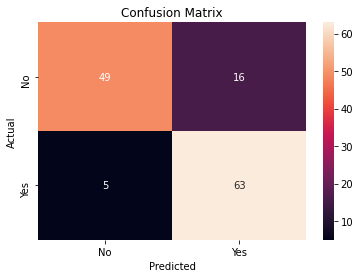

In [36]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.set_xticklabels(['No', 'Yes'])
ax.set_yticklabels(['No', 'Yes'])